# Prepare the data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

# Read in the aggregated dataset
data_agg = pd.read_csv(os.path.join("..", "data", "Final KMPL dataset.csv"))

# Drop the 'REG_NUM' column
data_agg = data_agg.drop('REG_NUM', axis=1)

In [5]:
# Select the columns for clustering
columns_for_clustering = ['Reg', 'KMPL',
                          'Total Transaction Amount', 'Mean Transaction Amount',
                          'Total No. of Litres', 'Mean No. of Litres']

data_agg_clustering = data_agg[columns_for_clustering]

# Remove rows with missing values
data_agg_clusters = data_agg_clustering.dropna()

# Select the data without the REG_NUM column for the actual clustering
data_agg_clustering = data_agg_clusters.drop('Reg', axis=1)

# Encode the categorical variables
data_agg_encoded = pd.get_dummies(data_agg_clustering)

# Prepare data for clustering (excluding 'REG_NUM' for actual clustering)
X_agg = data_agg_encoded.values

# Standardize the features
scaler_agg = StandardScaler()
X_agg_scaled = scaler_agg.fit_transform(X_agg)

X_agg_scaled.shape

(902, 5)

# k-means clustering

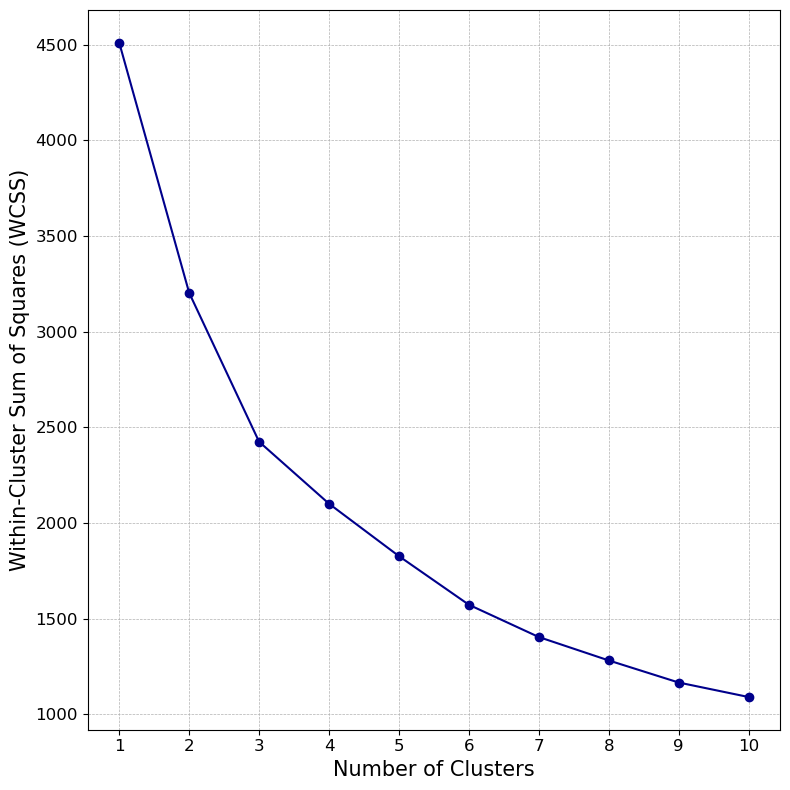

In [49]:
# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11): # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=1)
    kmeans.fit(X_agg_scaled)
    wcss.append(kmeans.inertia_)

# Create a professional-looking plot
plt.figure(figsize=(8, 8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='darkblue')
#plt.title('Elbow Method for Optimal Number of Clusters', fontsize=18, fontweight='bold')
plt.xlabel('Number of Clusters', fontsize=15)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=15)
plt.xticks(range(1, 11), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Save the plot as a PDF file with high resolution
plt.savefig('../plots/vehicle_clustering/kmeans_elbow_method_plot.pdf', format='pdf', dpi=300)

In [6]:
# Apply KMeans clustering
kclusts = 3
kmeans = KMeans(n_clusters=kclusts, init='k-means++', max_iter=300, n_init=10, random_state=1)
kmeans.fit(X_agg_scaled)

# Add cluster labels to the pivot_data DataFrame
data_agg['KmeansCluster'] = kmeans.labels_

# Agglomerative clustering

In [7]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Compute the condensed Euclidean distance matrix
distance_matrix = pdist(X_agg_scaled, metric='euclidean')

# Perform hierarchical clustering using the Ward method
Z_agg = linkage(distance_matrix, metric='ward')

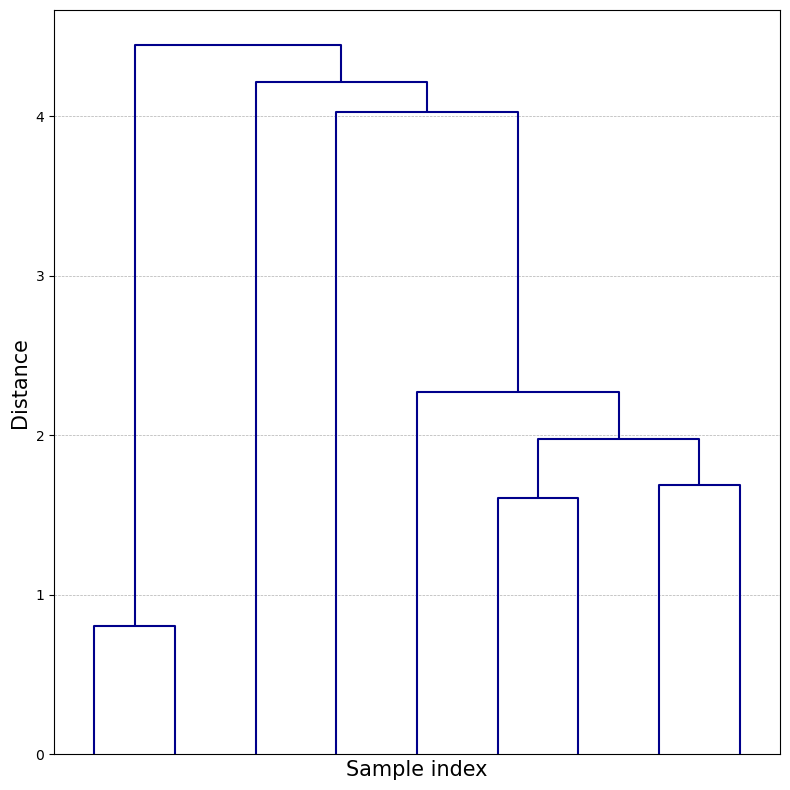

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Plotting the dendrogram
plt.figure(figsize=(8, 8))
dendrogram(Z_agg, no_labels=True, truncate_mode='level', p=5, color_threshold=0, link_color_func=lambda k: 'darkblue')

plt.xlabel('Sample index', fontsize=15)
plt.ylabel('Distance', fontsize=15)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Save the dendrogram as a PDF file with high resolution
plt.savefig('../plots/vehicle_clustering/agglomerative_dendrogram.pdf', format='pdf', dpi=300)
plt.show()  # Display the dendrogram

In [8]:
# Perform Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=4, metric='euclidean')
clusters = agg_clust.fit_predict(X_agg_scaled)

# Add cluster labels to the DataFrame
data_agg['AggCluster'] = clusters

# Plotting the results

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FixedLocator, FixedFormatter

def shorten_names(names, max_length=20):
    shortened_names = []
    for name in names:
        if len(name) > max_length:
            shortened_names.append(name[:max_length] + '...')
        else:
            shortened_names.append(name)
    return shortened_names

def countplot_side_by_side(data1, data2, title1, title2, filename):
    # Filter the data and calculate the sum of counts for the remaining categories
    filtered_data1 = data1.to_frame()
    filtered_data2 = data2.to_frame()
    
    # Shorten the names for each category
    shortened_names1 = filtered_data1.index.astype(str)
    shortened_names2 = filtered_data2.index.astype(str)
    
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
    
    # Set the font size for the labels
    label_font_size = 12
    y_label_font_size = 14
    
    # Plot the data for the first subplot
    ax1.bar(shortened_names1, filtered_data1.iloc[:, 0])
    ax1.set_xticks(range(len(shortened_names1)))
    ax1.set_xticklabels(shortened_names1, fontsize=label_font_size)
    ax1.set_ylabel('Count', fontsize=y_label_font_size)
    ax1.set_xlabel('Cluster', fontsize=y_label_font_size)
    ax1.set_title(f'a) {title1}')
    
    # Plot the data for the second subplot
    ax2.bar(shortened_names2, filtered_data2.iloc[:, 0])
    ax2.set_xticks(range(len(shortened_names2)))
    ax2.set_xticklabels(shortened_names2, fontsize=label_font_size)
    ax2.set_xlabel('Cluster', fontsize=y_label_font_size)
    ax2.set_title(f'b) {title2}')
    
    # Set the y-axis ticks and labels to integer values for both subplots
    yticks1 = ax1.get_yticks().astype(int)
    yticks2 = ax2.get_yticks().astype(int)
    ax1.yaxis.set_major_locator(FixedLocator(yticks1))
    ax1.yaxis.set_major_formatter(FixedFormatter(yticks1))
    ax1.tick_params(axis='y', labelsize=label_font_size)
    ax2.yaxis.set_major_locator(FixedLocator(yticks2))
    ax2.yaxis.set_major_formatter(FixedFormatter(yticks2))
    ax2.tick_params(axis='y', labelsize=label_font_size)
    
    # Adjust the spacing
    plt.tight_layout()
    
    # Save the plot as a PDF file
    plt.savefig(filename, format='pdf', bbox_inches='tight')
    
    # Close the plot
    plt.close(fig)

def stacked_bar_chart_clusters(data, categorical_var, cluster_var, x_title, filename, max_categories=5, max_length=20, color_theme='tab10'):
    # Calculate the proportions of each category in each cluster
    cluster_proportions = data.groupby([cluster_var, categorical_var]).size().unstack(fill_value=0)
    cluster_proportions = cluster_proportions.div(cluster_proportions.sum(axis=1), axis=0)
    
    # Get the top categories and group the rest into "Others"
    top_categories = cluster_proportions.sum().nlargest(max_categories).index
    cluster_proportions["Others"] = cluster_proportions.drop(columns=top_categories).sum(axis=1)
    cluster_proportions = cluster_proportions[top_categories.tolist() + ["Others"]]
    
    # Shorten the category names if necessary
    shortened_names = shorten_names(cluster_proportions.columns, max_length=max_length)
    
    # Check if the cluster labels start from 0 or -1
    if cluster_proportions.index.min() == 0:
        # Shift the cluster labels up by 1 and rename them
        cluster_proportions.index = ["Cluster " + str(i+1) for i in cluster_proportions.index]
    elif cluster_proportions.index.min() == -1:
        # Shift the cluster labels up by 1 (excluding -1) and rename them
        cluster_proportions.index = ["No Cluster" if i == -1 else "Cluster " + str(i+1) for i in cluster_proportions.index]
    
    # Create a figure with a single subplot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Set the font size for the labels
    label_font_size = 12
    y_label_font_size = 14
    
    # Get the specified color theme
    color_scheme = plt.cm.get_cmap(color_theme, len(cluster_proportions.columns))
    colors = color_scheme(range(len(cluster_proportions.columns)))
    
    # Create the stacked bar chart
    cluster_proportions.plot(kind='bar', stacked=True, ax=ax, legend=False, color=colors)
    
    ax.set_xticklabels(cluster_proportions.index, rotation=0, fontsize=label_font_size)
    ax.set_xlabel(x_title, fontsize=y_label_font_size)
    ax.set_ylabel('Proportion', fontsize=y_label_font_size)
    
    # Create the legend outside the plot
    ax.legend(title='Categories', fontsize=label_font_size, labels=shortened_names, 
              loc='center left', bbox_to_anchor=(1, 0.5))
    
    # Adjust the spacing
    plt.tight_layout()
    
    # Save the plot as a PDF file
    plt.savefig(filename, format='pdf', bbox_inches='tight')
    
    # Close the plot
    plt.close(fig)


def four_stacked_plots(data, categorical_vars, cluster_var, titles, filename, max_categories=8, max_length=20, color_theme='tab10', show_proportions=False):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))
    axs = axs.ravel()

    for i, (cat_var, title) in enumerate(zip(categorical_vars, titles)):
        # Calculate the proportions of each category in each cluster
        cluster_proportions = data.groupby([cluster_var, cat_var]).size().unstack(fill_value=0)
        cluster_proportions = cluster_proportions.div(cluster_proportions.sum(axis=1), axis=0)

        # Get the top categories and group the rest into "Others"
        top_categories = cluster_proportions.sum().nlargest(max_categories).index
        cluster_proportions["Others"] = cluster_proportions.drop(columns=top_categories).sum(axis=1)
        cluster_proportions = cluster_proportions[top_categories.tolist() + ["Others"]]

        # Shorten the category names if necessary
        shortened_names = shorten_names(cluster_proportions.columns, max_length=max_length)

        # Check if the cluster labels start from 0 or -1
        if cluster_proportions.index.min() == 0:
            # Shift the cluster labels up by 1 and rename them
            cluster_proportions.index = [str(i+1) for i in cluster_proportions.index]
        elif cluster_proportions.index.min() == -1:
            # Shift the cluster labels up by 1 (excluding -1) and rename them
            cluster_proportions.index = ["None" if i == -1 else str(i+1) for i in cluster_proportions.index]

        # Get the specified color theme
        color_scheme = plt.cm.get_cmap(color_theme, len(cluster_proportions.columns))
        colors = color_scheme(range(len(cluster_proportions.columns)))

        # Create the stacked bar chart in the corresponding subplot
        cluster_proportions.plot(kind='bar', stacked=True, ax=axs[i], legend=False, color=colors)
        axs[i].set_xticklabels(cluster_proportions.index, rotation=0, fontsize=12)
        axs[i].set_xlabel('Cluster', fontsize=14)
        axs[i].set_ylabel('Proportion', fontsize=14)
        axs[i].set_title(f"{chr(97+i)}) {title}")  # Prepend "a) ", "b) ", "c) ", "d) " to the titles

        if show_proportions:
            # Display the actual proportion numbers on the stacked bar plots if the proportion is greater than 0.1
            for j, rect in enumerate(axs[i].patches):
                height = rect.get_height()
                if height > 0.05:
                    axs[i].text(rect.get_x() + rect.get_width() / 2, rect.get_y() + height / 2,
                                f"{height:.2f}", ha='center', va='center', fontsize=9, color='black')

        # Create the legend for each subplot
        axs[i].legend(title='Categories', fontsize=10, labels=shortened_names, loc='center left', bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    plt.savefig(filename, format='pdf', bbox_inches='tight', dpi=300)
    plt.close(fig)

def boxplot_side_by_side_cont(data, cat_var, cont_var1, cont_var2, title1, title2, filename):
    # Setting the aesthetic style of the plots
    sns.set(style="whitegrid")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

    # Plot the first boxplot
    sns.boxplot(x=cat_var, y=cont_var1, data=data, ax=ax1, palette="cividis")
    ax1.set_ylabel(cont_var1, fontsize=14)
    ax1.set_xlabel('Cluster', fontsize=14)
    ax1.set_title(f'a) {title1}')

    # Plot the second boxplot
    sns.boxplot(x=cat_var, y=cont_var2, data=data, ax=ax2, palette="cividis")
    ax2.set_ylabel(cont_var2, fontsize=14)
    ax2.set_xlabel('Cluster', fontsize=14)
    ax2.set_title(f'b) {title2}')

    # Adjust the spacing
    plt.tight_layout()

    # Save the plot as a PDF file with high resolution
    plt.savefig(filename, format='pdf', dpi=300)

    # Close the plot
    plt.close(fig)

def boxplot_side_by_side_cat(data, cat_var1, cat_var2, cont_var, title1, title2, filename):
    # Setting the aesthetic style of the plots
    sns.set(style="whitegrid")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

    # Plot the first boxplot
    sns.boxplot(x=cat_var1, y=cont_var, data=data, ax=ax1, palette="cividis")
    ax1.set_ylabel(cont_var, fontsize=14)
    ax1.set_xlabel('Cluster', fontsize=14)
    ax1.set_title(f'a) {title1}')

    # Plot the second boxplot
    sns.boxplot(x=cat_var2, y=cont_var, data=data, ax=ax2, palette="cividis")
    ax2.set_ylabel(cont_var, fontsize=14)
    ax2.set_xlabel('Cluster', fontsize=14)
    ax2.set_title(f'b) {title2}')

    # Adjust the spacing
    plt.tight_layout()

    # Save the plot as a PDF file with high resolution
    plt.savefig(filename, format='pdf', dpi=300)

    # Close the plot
    plt.close(fig)

def create_proportions_tables(data, categorical_vars, cluster_var, titles, max_categories=8, max_length=20):
    tables = []

    for cat_var, title in zip(categorical_vars, titles):
        # Calculate the proportions of each category in each cluster
        cluster_proportions = data.groupby([cluster_var, cat_var]).size().unstack(fill_value=0)
        cluster_proportions = cluster_proportions.div(cluster_proportions.sum(axis=1), axis=0)

        # Get the top categories and group the rest into "Others"
        top_categories = cluster_proportions.sum().nlargest(max_categories).index
        cluster_proportions["Others"] = cluster_proportions.drop(columns=top_categories).sum(axis=1)
        cluster_proportions = cluster_proportions[top_categories.tolist() + ["Others"]]

        # Shorten the category names if necessary
        shortened_names = shorten_names(cluster_proportions.columns, max_length=max_length)
        cluster_proportions.columns = shortened_names

        # Check if the cluster labels start from 0 or -1
        if cluster_proportions.index.min() == 0:
            # Shift the cluster labels up by 1 and rename them
            cluster_proportions.index = [str(i+1) for i in cluster_proportions.index]
        elif cluster_proportions.index.min() == -1:
            # Shift the cluster labels up by 1 (excluding -1) and rename them
            cluster_proportions.index = ["None" if i == -1 else str(i+1) for i in cluster_proportions.index]

        # Multiply by 100 and round to 2 decimal places
        cluster_proportions = cluster_proportions.round(2)

        # Add the title as a column to the table
        cluster_proportions.insert(0, 'Cluster', cluster_proportions.index)
        cluster_proportions.index = [title] * len(cluster_proportions)

        # Add the table to the list of tables
        tables.append(cluster_proportions)

    return tables


In [9]:
data_agg.columns

Index(['Reg', 'Overlap_Start', 'Overlap_End', 'Total_Km', 'Total_Litres',
       'KMPL', 'VEHICLE MAKE', 'MODEL DERIVATIVE', 'DEPARTMENT', 'District',
       'Site', 'Site Lat', 'Site Long', 'Fuel Type', 'RATE CARD CATEGORY',
       'Total Transaction Amount', 'Mean Transaction Amount',
       'Total No. of Litres', 'Mean No. of Litres', 'KmeansCluster',
       'AggCluster'],
      dtype='object')

In [10]:
# Add 1 to both cluster labels to start from 1
data_agg['KmeansCluster'] = data_agg['KmeansCluster'] + 1
data_agg['AggCluster'] = data_agg['AggCluster'] + 1

# Convert the 'KmeansCluster' and 'AggCluster' columns to categorical
data_agg['KmeansCluster'] = data_agg['KmeansCluster'].astype('category')
data_agg['AggCluster'] = data_agg['AggCluster'].astype('category')

# Set the category .as_ordered()
data_agg['KmeansCluster'] = data_agg['KmeansCluster'].cat.as_ordered()
data_agg['AggCluster'] = data_agg['AggCluster'].cat.as_ordered()

kmeans_clust = data_agg['KmeansCluster'].value_counts()
agg_clust = data_agg['AggCluster'].value_counts()

In [57]:
countplot_side_by_side(kmeans_clust, agg_clust, 
                     'k-means', 'agglomerative', 
                     '../plots/vehicle_clustering/cluster_counts.pdf')

In [77]:
boxplot_side_by_side_cat(data_agg, 'KmeansCluster', 'AggCluster', 
                         'Mean Transaction Amount', 
                     'k-means', 'agglomerative',
                     '../plots/vehicle_clustering/cluster_boxplots_meanstrans.pdf')

boxplot_side_by_side_cat(data_agg, 'KmeansCluster', 'AggCluster', 
                         'Mean No. of Litres', 
                     'k-means', 'agglomerative',
                     '../plots/vehicle_clustering/cluster_boxplots_meanlitres.pdf')

In [25]:
four_stacked_plots(data_agg,
                   ['MODEL DERIVATIVE', 'DEPARTMENT', 'District', 'RATE CARD CATEGORY'],
                   'KmeansCluster',
                   ['Model Derivative', 'Department', 'District', 'Rate Card Category'],
                   '../plots/vehicle_clustering/kmeans_clustered_vehicle_plots.pdf',
                   max_categories=5, max_length=15, show_proportions=True)

four_stacked_plots(data_agg,
                   ['MODEL DERIVATIVE', 'DEPARTMENT', 'District', 'RATE CARD CATEGORY'],
                   'AggCluster',
                   ['Model Derivative', 'Department', 'District', 'Rate Card Category'],
                   '../plots/vehicle_clustering/agg_clustered_vehicle_plots.pdf',
                   max_categories=5, max_length=15, show_proportions=True)

/var/folders/v7/l0jq1cbd0fnf4ytmwzksxt0r0000gn/T/ipykernel_15722/3721279189.py:144: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_scheme = plt.cm.get_cmap(color_theme, len(cluster_proportions.columns))
/var/folders/v7/l0jq1cbd0fnf4ytmwzksxt0r0000gn/T/ipykernel_15722/3721279189.py:144: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_scheme = plt.cm.get_cmap(color_theme, len(cluster_proportions.columns))
/var/folders/v7/l0jq1cbd0fnf4ytmwzksxt0r0000gn/T/ipykernel_15722/3721279189.py:144: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colorm

In [34]:
create_proportions_tables(data_agg,
                   ['MODEL DERIVATIVE', 'DEPARTMENT', 'District', 'RATE CARD CATEGORY'],
                   'KmeansCluster',
                   ['Model Derivative', 'Department', 'District', 'Rate Card Category'],
                   max_categories=5, max_length=20)

[                 Cluster  VW POLO VIVO 1.6 SED...  TOYOTA COROLLA QUEST...  \
 Model Derivative       1                     0.34                     0.30   
 Model Derivative       2                     0.02                     0.02   
 Model Derivative       3                     0.02                     0.01   
 
                   250 D/C HI-RIDE GEN ...  NISSAN HARDBODY NP30...  \
 Model Derivative                     0.01                     0.03   
 Model Derivative                     0.16                     0.04   
 Model Derivative                     0.13                     0.07   
 
                   D-MAX 250 HO 4X4 CRE...  Others  
 Model Derivative                     0.01    0.32  
 Model Derivative                     0.07    0.69  
 Model Derivative                     0.02    0.76  ,
            Cluster  HEALTH  EMERGENCY MEDICAL SE...  SOCIAL DEVELOPMENT  \
 Department       1    0.28                     0.05                0.20   
 Department       2    0.37    

In [33]:
create_proportions_tables(data_agg,
                   ['MODEL DERIVATIVE', 'DEPARTMENT', 'District', 'RATE CARD CATEGORY'],
                   'AggCluster', 
                   ['Model Derivative', 'Department', 'District', 'Rate Card Category'],
                   max_categories=5, max_length=20)

[                 Cluster  VW POLO VIVO 1.6 SEDAN  TOYOTA COROLLA QUEST 1.6  \
 Model Derivative       1                    0.01                      0.00   
 Model Derivative       2                    0.18                      0.04   
 Model Derivative       3                    0.00                      0.00   
 Model Derivative       4                    0.31                      0.40   
 
                   250 D/C HI-RIDE GEN 6  NISSAN HARDBODY NP300 2.5 TDI  \
 Model Derivative                   0.18                           0.04   
 Model Derivative                   0.07                           0.05   
 Model Derivative                   0.15                           0.06   
 Model Derivative                   0.00                           0.02   
 
                   D-MAX 250 HO 4X4 CREW CAB HI-R...  Others  
 Model Derivative                               0.07    0.70  
 Model Derivative                               0.02    0.63  
 Model Derivative                    